# SVM

Do inglês Support Vector Machines, é um modelo com intuição simple, mas com matemática complexa. Assim ele se torna um modelos complexo e poderoso pela sua ***capacidade de adpatação aos dados***

>O SVM, criado por Vapnik e seus colegas na década de 1990, é um dos modelos mais utilizados em produção devido a sua capacidade de adaptar diversos tipos de dados, aumentando a probabilidade deles de serem linearmente separáveis.


## Modelo linear

É um modelo em que uma classe tem seus elementos com uma distância ente si existindo facilmente um modelos de separar esses dados por meio de uma reta

**Figura 1** - 

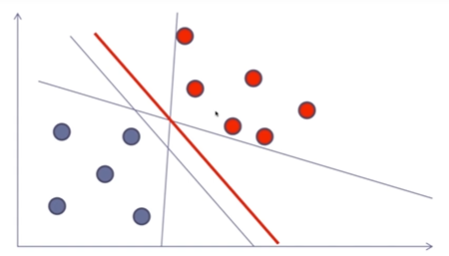

Fonte: Lead Dell

Um conjunto de dados está separado em duas classes, uma das classes é o conjunto de dado sque está dentro de uma sala e a outra classes está dentro de um quarto, assim existe uma parede que divide esses dados. ***Construindo uma parede com a menor distância possível entre as duas classes, assim exitiria um melhor plano separador***.

>A ideia das SVMs é definir o **melhor plano separador** será a reta que aumenta a margem de distância  para os dois conjuntos.

**Figura 2** - 

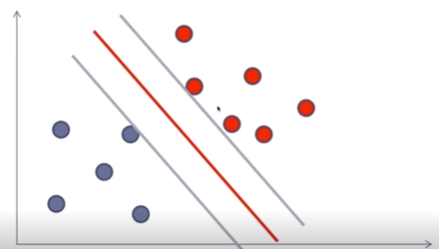

Fonte: Lead Dell

Nos conjuntos de dados existe aquele dado que está mais próximos do conjunto de dados do outro lado, esses dados podem ser interpretados como "limites". 

Ao construir uma reta que separe os conjuntos de dados, ela sera mais próxima dos limites tanto do limite dos positivos quanto dos negativos, dai a ideia é construir uma reta  de maneira que ela maximize a distância para esses dois limites, ou seja, se essa reta ficar mais próxima dos lado positivo ela vai possuir uma boa margem de distância para o lado negativo, poreém não vai ter uma margem muito boa para o lado positco, o oposto também é válido.

> A ideia é tentar construir essa reta para  ficar a uma distância igual tanto dos positivos quanto dos negativos, onde esse vetor ficara igual tanto do limite dos dados positivos quanto dos negativos.

## Implementação em classificação 

Modelo incluso na biblioteca *sklearing*. Nessa implementação será usado a base de dados de cancêr de mama para contruir o modelo de SVM para classificar os dados de maneira correta.

In [1]:
# Carregar o conjunto de dados de cancer de mama
from sklearn.datasets import load_breast_cancer

In [2]:
# Função de divisão de treino e teste
from sklearn.model_selection import train_test_split

In [3]:
# SVM para classificação SVC para regressão SVR
from sklearn.svm import SVC

### Base de dados

In [6]:
X, y = load_breast_cancer(return_X_y=True)
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y)

### Treinando o modelo SVM

Para o modelo de classificação em SVM é usado o comando *SVC()*, o parametro *C* é uma medida de quanto o modelo pode errar, no sentido que quando o modelo não for perfeitamente linearmente separavel o modelo não precisa separar perfeitamente o modelo, permitindo assim um erro controlado, assim é o **custo de errar**, por padrão C = 1. Além disso, temos o parâmetro *Kernel* refere-se uma transformação nos dados tendo uma performace ainda melhor no modelo.



>O SVM constrói uma reta capaz de separar os dados de acordo com suas respectivas classes. Porém, se os dados não forem linearmente separáveis, se torna inviável construir uma reta que os separe. Então, para solucionar esse problema, existe um parâmetro que permite a tolerância a erros na separação dos dados.

In [7]:
svm = SVC(kernel='linear',C=1.0)

In [8]:
svm.fit(X_treino,y_treino)

SVC(kernel='linear')

### Validação do modelo

In [9]:
svm.score(X_teste,y_teste)

0.965034965034965

## Implementando modelos de SVM com kernel

Existe dados que não são lineramente separavéis, como ilustrado na figura abaixo, nesse não é possível trasar um reta que separe as classes dos dados, usando o kernel linar não é possível ter bons resultados.

Por padrão o sklearing tem com o kernel RBF.

**Figura 4**

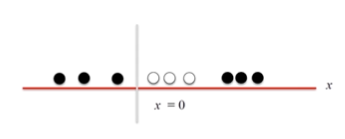

Fonte: Lead Dell

>O **Kernel** é uma função que será aplicada no conjunto de dados, de modo que esse conjunto de dados possa ser transformado em um outro conjunto apenas em tempo de executação, tornando os dados no modelo lineramente separável.

**Figura 5**

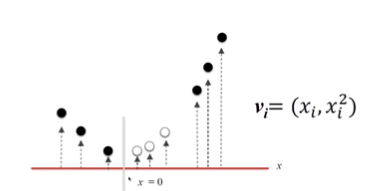

Fonte: Lead Dell

Existe varias função que podem ser aplicadas no kernel. Transformando os dados dentro do modelo, ou seja, os dados não serão alterados.

### Base de dados

A base de dados é a da Íris.

In [10]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [25]:
X,y = load_iris(return_X_y=True)
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y)

### Criando e validando o modelo SVM com  kernel linear

In [17]:
svm = SVC(kernel='linear')
svm.fit(X_treino,y_treino)
svm.score(X_teste,y_teste)

0.9473684210526315

### Criando e validando o modelo SVM com  kernel polinomial

Esse kernel tem como objetivo elevar os dados de acordo com um certo grau, também passado por parâmetro *degree*.

In [23]:
svm_kernel = SVC(kernel = 'poly', degree=3)
svm_kernel.fit(X_treino,y_treino)
svm_kernel.score(X_teste,y_teste)

0.9736842105263158

### Criando e validando o modelo SVM com  kernel RBF

Se baseia na distância euclidianada quadrática elevada pela função exponencial. Esse kernel, possui uma maior funcionalidade para uma gama de dados, com escala maiores e padrões maiores.


In [27]:
svm_rbf = SVC(kernel = 'rbf')
svm_rbf.fit(X_treino,y_treino)
svm_rbf.score(X_teste,y_teste)

0.9736842105263158